In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plot
%matplotlib inline
import os
import glob
import numpy as np
from scipy.sparse import vstack
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb

import datetime
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import datetime
#import matplotlib.pyplot as plt
import pandas as pd
import glob
import tqdm
import datetime
import keras
import numpy as np
#test getWindowedValue
import numpy as np
from numpy.lib.stride_tricks import as_strided
from keras.models import Sequential
from keras.layers.convolutional import Conv3D,Conv2D,MaxPooling1D,MaxPooling2D,MaxPooling3D,Conv1D
from keras.layers import Lambda,Multiply ,TimeDistributed
from keras.layers import GlobalAveragePooling1D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers.wrappers import TimeDistributed
from keras import initializers
from keras.engine import InputSpec, Layer
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam,SGD
import tensorflow as tf
import keras.backend.tensorflow_backend as K
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential,Model
from keras.optimizers import Adam,RMSprop
from keras.activations import tanh,relu
#from keras.utils import multi_gpu_model
from keras.layers.advanced_activations import PReLU,LeakyReLU,ELU
from keras.layers import Dense, Dropout, Activation, Flatten,LSTM,GRU,Input,InputLayer,Activation, Input,Conv1D,MaxPooling1D,GlobalAveragePooling1D
from keras.layers import Convolution2D, MaxPooling2D,TimeDistributed,Convolution1D,MaxPooling1D,concatenate, Average,BatchNormalization,GlobalMaxPool1D
from keras.utils import np_utils
from keras import losses
#from keras_tqdm import TQDMNotebookCallback
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.grid_search import GridSearchCV
import sklearn
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from IPython.display import SVG

import keras
#from fastText import train_unsupervised

LengthOfInputSequences=60

Using TensorFlow backend.
/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
fileTrain='./train.txt'
fileDev='./dev.txt'
fileTest='./dfs-test.txt'
fileTest='../vardial2018gold/DFS/dfs-gold.txt'



In [3]:
from string import punctuation
def text_to_wordlist(text, remove_stop_words=True, stem_words=False):
    # Clean the text, with the option to remove stop_words and to stem words.
    
    # Convert words to lower case and split them
    #text = text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"what's", "", text)
    text = re.sub(r"What's", "", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\0k ", "0000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " America ", text)
    text = re.sub(r" USA ", " America ", text)
    text = re.sub(r" u s ", " America ", text)
    text = re.sub(r" uk ", " England ", text)
    text = re.sub(r" UK ", " England ", text)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3", text) 
    text = re.sub(r"the US", "America", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)

In [4]:
def loadData(fname):
    return pd.read_csv(fname, sep='\t',header=-1)


#22ste

def fitlerLine(lin):
    lin=lin.lower()
    for k in ['.',',','?',"'s","'t",',']:
        lin=lin.replace(k,' '+k+' ')
    #for k in ['.',',','?','!']:
    #    lin=lin.replace(k,' ')
    while '  ' in lin:
        lin=lin.replace('  ',' ')
    return lin.strip()

In [5]:
df=loadData(fileTrain)

In [6]:
df.describe

<bound method NDFrame.describe of                                                         0    1
0       Dat zeg ik liever niet. Ik moet een beslissing...  BEL
1       De problemen van de westerse wereld zijn in ve...  BEL
2       Uw werkgever krijgt 't moeilijk met mogelijke ...  BEL
3       Kijk eens aan. Die man schildert ten behoeve v...  BEL
4       Nooit. Ik weet het niet. Misschien was je me w...  BEL
5       Je staat voor schut, en je verknalt je hele le...  BEL
6       All in. Dit verbaast me. Perrault re raisede M...  BEL
7       Broadway is een prachtig Engels dorpje bij de ...  BEL
8       Maar ze was niet thuis. Wie niet? Alison. Mijn...  BEL
9       Gaat hij goed, de Story? Nee? Ik denk dat het ...  BEL
10      Hebben we hun lijnen? Neem ze af. Waar is de v...  BEL
11      Ik heb uren op de grond gelegen voor de poten ...  BEL
12      Niet bij mij. Bij mij schept hij niet op. Toch...  BEL
13      De zwelling is hier minder. Al die vloeistof v...  BEL
14      Ga jij maar. 

In [7]:
trainxRaw=list(map(fitlerLine,df[0]))

In [8]:
print(trainxRaw[:2])

['dat zeg ik liever niet . ik moet een beslissing nemen voor het welzijn van dit meisje . dimeola zal een exorcisme zijn psychisch zieke dochter schaden . is dat waar of niet ?', 'de problemen van de westerse wereld zijn in veel opzichten anders dan 2 . 000 jaar geleden . maar onze burgerplicht blijft dezelfde . ons erfgoed verdedigen tegen wie het wil verdelen en vernietigen .']


In [9]:
trainyRaw=df[1].values
print(len(trainyRaw),trainyRaw[:10])


300000 ['BEL' 'BEL' 'BEL' 'BEL' 'BEL' 'BEL' 'BEL' 'BEL' 'BEL' 'BEL']


In [10]:
devdata=loadData(fileDev)
devxRaw=list(map(fitlerLine,devdata[0]))
devyRaw=devdata[1].values
print(len(devxRaw))
print(len(devyRaw),devyRaw[:10])


500
500 ['BEL' 'BEL' 'BEL' 'BEL' 'BEL' 'BEL' 'BEL' 'BEL' 'BEL' 'BEL']


In [26]:
testdata=loadData(fileTest)
testy=testdata[1].values
testxRaw=list(map(fitlerLine,testdata[0]))

In [12]:
testdata.describe
print(testxRaw[:10])

['waar ze biologische producten verbouwen . ze geniet van het buitenleven en haar dieren . tim van 30 woont in hilversum , is vrijgezel . in het dagelijks leven is hij online marketeer en hij besteed elke vrije minuut aan zijn boy toys .', 'en dan ga je mee . als ik echt vond dat het tijd werd voor iets anders , zou ik dat zeggen . als je een relatie hebt moet je daarover kunnen praten .', 'ik ben niet op zoek naar acteurs die goed spelen , maar eerder acteurs die in de huid kruipen van het personage . ik stel zware eisen aan de acteurs . ze moeten zich inleven ,', "olds escorteerde bommenwerpers boven europa . een keer werden 52 b 17 's neergeschoten door messerschmitt 's in drie minuten . het was vreselijk voor olds om dit te aanzien . de b 17 's waren machteloos .", 'helemaal mee eens . en ze hebben mij uitgekotst . dus ik doe mee . ik wil ze best op straat gooien . je twijfelt toch niet aan mijn loyaliteit ? hoe zit het met eric ?', 'wat naar , zeg . waar lijdt ze aan ? het is een 

from langid.langid import LanguageIdentifier, model
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)

for r in devxRaw[10:]:
    print(r,identifier.classify(r))
    break;
import langid
langid.set_languages(['de','fr','it','en'])
idscores=[langid.classify(r) for r in devxRaw]

print(([s[0] for s in idscores]))
print(devyRaw)
#print(([s[1] for s in idscores]))

In [14]:
a='1 2  3'
print(a.split())

['1', '2', '3']


In [13]:
def mytoken(lin):
    return lin.split()
tfv = TfidfVectorizer(min_df=2,use_idf=1,
                      smooth_idf=1,ngram_range=(1,3),
                     )#analyzer='char_wb') #,stop_words='english')




#tsvd=TruncatedSVD(n_components=400,random_state=2016)   # this gives similar results as to Semeval , try n_components=600
#trainx=tsvd.fit_transform(trainx)
#evalx=tsvd.transform(evalx)
#clf=LinearDiscriminantAnalysis()


In [14]:
trainx=tfv.fit_transform(trainxRaw)
evalx=tfv.transform(devxRaw)
print (tfv.get_feature_names()[:10])
print (tfv.get_feature_names()[-10:])
print (trainx.shape,evalx.shape)


['00', '00 24', '00 28', '00 29', '00 36', '00 52', '00 55', '00 de', '00 en', '00 is']
['zwommen', 'zwommen in', 'zwommen met', 'zwommen met de', 'zx', 'zybutz', 'zz', 'zz top', 'zzp', 'zzyzx']
(300000, 1449159) (500, 1449159)


In [18]:
trainy=trainyRaw
evaly=devyRaw

In [257]:
with open('features.txt','w') as fout:
    fout.writelines('\n'.join(tfv.get_feature_names()))

In [18]:
clf=LinearSVC()

clf.fit(trainx,trainy)
predictValue=clf.predict(evalx)
print(confusion_matrix(evaly,predictValue))
print(classification_report(evaly,predictValue))

[[170  80]
 [ 76 174]]
             precision    recall  f1-score   support

        BEL       0.69      0.68      0.69       250
        DUT       0.69      0.70      0.69       250

avg / total       0.69      0.69      0.69       500



In [23]:
#tfidf learned from train and dev
tfv = TfidfVectorizer(min_df=2,use_idf=1,
                      smooth_idf=1,ngram_range=(1,3),
                     )
tempTrain=trainxRaw.copy()
print(len(tempTrain))
tempTrain.extend(devxRaw)
print(len(tempTrain))
tfv.fit(tempTrain)
tempTrain=None

300000
300500


In [25]:
#exame tfv features
print(len(tfv.get_feature_names()))

1453534


In [15]:
trainx=tfv.transform(trainxRaw)
evalx=tfv.transform(devxRaw)

In [16]:
#load test file
fileTest='./dfs-test.txt'
testdata=loadData(fileTest)
testxRaw=list(map(fitlerLine,testdata[0]))
testx=tfv.transform(testxRaw)
print(testx.shape)

(20000, 1449159)


In [35]:
import sklearn
sklearn.__version__

'0.19.0'

In [19]:
sf=sklearn.model_selection.StratifiedKFold(50)
from sklearn.datasets import make_classification
#from xgboost import XGBClassifer
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
cvcount=0
allPredicts=[]
import os
os.system('mkdir -p models')

#trainx,trainy=make_classification(100000)
#print(trainx.shape,trainy.shape)
for trainindex,devindex in sf.split(trainx,trainy):
    cvtrainx,cvtrainy=trainx[trainindex],trainy[trainindex]
    cvdevx,cvdevy=trainx[devindex],trainy[devindex]
    #clf=LinearSVC()   #BaggingClassifier(base_estimator=LinearSVC(),n_estimators=3,n_jobs=-1)
    #clf.fit(cvtrainx,cvtrainy)
    
    clf=lgb.LGBMClassifier(num_leaves=100,n_jobs=12,
                                learning_rate=0.1,n_estimators=1000,silent=False)
    
    clf.fit(cvtrainx,cvtrainy,early_stopping_rounds=20,
        eval_set=(cvdevx,cvdevy),
        verbose=True)
    
    #score1=clf.score(cvdevx,cvdevy)
    #score2=clf.score(evalx,evaly)
    predictValue=clf.predict(cvdevx)
    #print('===============\t%d\t%f\t%f'%(cvcount,score1,score2))
    
    print(confusion_matrix(cvdevy,predictValue))
    print(classification_report(cvdevy,predictValue))
    #predictValue=clf.predict(evalx)    
    #print(confusion_matrix(evaly,predictValue))
    #print(classification_report(evaly,predictValue))
    #clf=LinearSVC()
    #print(type(cvtrainy),type(evaly))
    #clf.fit(vstack((cvtrainx,evalx)),np.concatenate((cvtrainy,evaly)))
    '''
    clf=lgb.LGBMClassifier(num_leaves=100,n_jobs=12,
                                learning_rate=0.1,n_estimators=1000,silent=False)

    clf.fit(vstack((cvtrainx,evalx)),np.concatenate((cvtrainy,evaly)),early_stopping_rounds=20,
        eval_set=(cvdevx,cvdevy),
        verbose=True)
    
    score1=clf.score(cvdevx,cvdevy)
    score2=clf.score(evalx,evaly)
    #predictValue=clf.predict(cvdevx)
    print('===============\t%d\t%f\t%f'%(cvcount,score1,score2))
    
    modelName='./models/%02d_%f_%f.lgbm'%(cvcount,score1,score2)

    pickle.dump(clf,open(modelName,'wb'))
    testPredict=clf.predict(testx)
    predictFile='./models/%02d_%f_%f.lgbm.predict'%(cvcount,score1,score2)
    with open(predictFile,'w') as fout:
        fout.write(' '.join(testPredict))
    allPredicts.append(testPredict)
    '''
    cvcount+=1

    
    
    
'''
#light boost

[[1860 1140]
 [1114 1886]]
             precision    recall  f1-score   support

        BEL       0.63      0.62      0.62      3000
        DUT       0.62      0.63      0.63      3000

avg / total       0.62      0.62      0.62      6000

[1]	valid_0's binary_logloss: 0.690368
Training until validation scores don't improve for 20 rounds.

'''

[1]	valid_0's binary_logloss: 0.69054
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's binary_logloss: 0.688307
[3]	valid_0's binary_logloss: 0.686218
[4]	valid_0's binary_logloss: 0.684618
[5]	valid_0's binary_logloss: 0.683382
[6]	valid_0's binary_logloss: 0.682077
[7]	valid_0's binary_logloss: 0.680795
[8]	valid_0's binary_logloss: 0.679673
[9]	valid_0's binary_logloss: 0.678634
[10]	valid_0's binary_logloss: 0.677843
[11]	valid_0's binary_logloss: 0.676642
[12]	valid_0's binary_logloss: 0.675774
[13]	valid_0's binary_logloss: 0.675065
[14]	valid_0's binary_logloss: 0.674461
[15]	valid_0's binary_logloss: 0.673586
[16]	valid_0's binary_logloss: 0.67253
[17]	valid_0's binary_logloss: 0.671906
[18]	valid_0's binary_logloss: 0.670814
[19]	valid_0's binary_logloss: 0.670111
[20]	valid_0's binary_logloss: 0.669062
[21]	valid_0's binary_logloss: 0.668262
[22]	valid_0's binary_logloss: 0.667294
[23]	valid_0's binary_logloss: 0.666746
[24]	valid_0's binary_logloss

KeyboardInterrupt: 

In [47]:
print(len(allPredicts))
print(len(allPredicts[0]))

50
20000


In [53]:
#generate final submission
finalPredict=np.array(allPredicts).T

In [54]:
print(finalPredict.shape)

(20000, 50)


In [70]:
from collections import Counter
with open('submit.txt','w') as fout:
    for l in finalPredict:
        print(Counter(l).most_common()[0][0])
        fout.write(Counter(l).most_common()[0][0]+'\n')

DUT
BEL
BEL
DUT
DUT
DUT
DUT
DUT
DUT
BEL
DUT
DUT
DUT
BEL
BEL
DUT
BEL
BEL
DUT
BEL
DUT
BEL
DUT
DUT
DUT
BEL
BEL
BEL
DUT
BEL
BEL
DUT
DUT
BEL
DUT
BEL
DUT
BEL
BEL
DUT
DUT
DUT
BEL
BEL
DUT
BEL
BEL
DUT
DUT
DUT
DUT
DUT
BEL
BEL
BEL
BEL
BEL
BEL
BEL
BEL
DUT
BEL
BEL
DUT
BEL
DUT
DUT
BEL
BEL
BEL
BEL
BEL
BEL
BEL
BEL
DUT
DUT
DUT
BEL
DUT
DUT
BEL
DUT
BEL
DUT
BEL
DUT
BEL
DUT
DUT
DUT
BEL
DUT
BEL
BEL
BEL
DUT
DUT
DUT
BEL
BEL
BEL
BEL
DUT
DUT
BEL
DUT
DUT
DUT
DUT
DUT
DUT
DUT
DUT
DUT
BEL
BEL
DUT
BEL
BEL
DUT
DUT
DUT
BEL
DUT
BEL
BEL
BEL
DUT
BEL
BEL
BEL
BEL
DUT
DUT
DUT
DUT
BEL
BEL
BEL
BEL
DUT
DUT
DUT
DUT
BEL
BEL
DUT
BEL
DUT
DUT
BEL
DUT
BEL
DUT
DUT
BEL
BEL
DUT
DUT
BEL
BEL
DUT
BEL
BEL
DUT
BEL
DUT
BEL
BEL
DUT
BEL
BEL
DUT
BEL
BEL
DUT
BEL
DUT
BEL
BEL
BEL
DUT
BEL
DUT
DUT
DUT
BEL
BEL
BEL
BEL
DUT
DUT
BEL
BEL
BEL
BEL
BEL
BEL
BEL
BEL
BEL
BEL
BEL
DUT
DUT
BEL
BEL
DUT
BEL
BEL
DUT
BEL
DUT
DUT
DUT
DUT
DUT
BEL
DUT
BEL
DUT
BEL
DUT
DUT
DUT
BEL
DUT
DUT
DUT
BEL
BEL
DUT
BEL
BEL
DUT
BEL
DUT
DUT
BEL
DUT
DUT
DUT
BEL
DUT
BEL
DUT
BEL
DUT
DUT


In [266]:
print(trainx.shape,trainy.shape,evalx.shape,evaly.shape)
clf=lgb.LGBMClassifier(num_leaves=150,n_jobs=12,
                                learning_rate=0.1,n_estimators=1000,silent=False)

clf.fit(trainx,trainy,early_stopping_rounds=20,
        eval_set=(evalx,evaly),
        verbose=True)
predictValue=clf.predict(evalx)
print(confusion_matrix(evaly,predictValue))
print(classification_report(evaly,predictValue))

(300000, 644564) (300000,) (500, 644564) (500,)
[1]	valid_0's binary_logloss: 0.692145
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's binary_logloss: 0.690955
[3]	valid_0's binary_logloss: 0.690054
[4]	valid_0's binary_logloss: 0.68992
[5]	valid_0's binary_logloss: 0.689989
[6]	valid_0's binary_logloss: 0.689144
[7]	valid_0's binary_logloss: 0.688645
[8]	valid_0's binary_logloss: 0.688399
[9]	valid_0's binary_logloss: 0.688552
[10]	valid_0's binary_logloss: 0.68827
[11]	valid_0's binary_logloss: 0.686846
[12]	valid_0's binary_logloss: 0.686406
[13]	valid_0's binary_logloss: 0.686123
[14]	valid_0's binary_logloss: 0.686474
[15]	valid_0's binary_logloss: 0.686478
[16]	valid_0's binary_logloss: 0.685755
[17]	valid_0's binary_logloss: 0.68581
[18]	valid_0's binary_logloss: 0.685611
[19]	valid_0's binary_logloss: 0.684769
[20]	valid_0's binary_logloss: 0.684982
[21]	valid_0's binary_logloss: 0.684513
[22]	valid_0's binary_logloss: 0.683972
[23]	valid_0's binary_

In [13]:
#fasttext
import fastText

In [14]:
print(type(trainyRaw),type(trainxRaw))

<class 'numpy.ndarray'> <class 'list'>


In [15]:
rawdutFile='./data/rawdut.txt'
rawbelFile='./data/rawbel.txt'
trainlabeled='./data/trainlabeled.txt'
devlabeled='./data/devlabeled.txt'
preFiexed='__label__'


In [16]:
with open(trainlabeled,'w') as fout:
    for x,y in zip(trainxRaw,trainy):
        fout.write('__label__{} {}\n'.format(y,x))

with open(devlabeled,'w') as fout:
    for x,y in zip(devxRaw,devyRaw):
        fout.write('__label__{} {}\n'.format(y,x))

In [17]:

rawDu=np.array(trainxRaw)[trainyRaw=='DUT']
os.system('mkdir -p data')
with open(rawdutFile,'w') as fout:
    fout.writelines('\n'.join(map(str,rawDu)))
    
rawBel=np.array(trainxRaw)[trainyRaw=='BEL']
os.system('mkdir -p data')
with open('./data/rawbel.txt','w') as fout:
    fout.writelines('\n'.join(map(str,rawBel)))

In [18]:
dir(fastText)

['BOW',
 'EOS',
 'EOW',
 'FastText',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'division',
 'load_model',
 'print_function',
 'tokenize',
 'train_supervised',
 'train_unsupervised',
 'unicode_literals']

In [26]:
classifier = fastText.train_supervised(trainlabeled)

result = classifier.test(devlabeled)
#print ('P@1:', result.precision)
#print ('R@1:', result.recall)
#print ('Number of examples:', result.nexamples)

In [27]:
print(result)

(500, 0.586, 0.586)


In [28]:
#simple CNN

In [21]:
#print(trainx[0])
#get vocab by tfidf get_feature_names
tfv = TfidfVectorizer(min_df=5,use_idf=1,
                      smooth_idf=1,ngram_range=(1,1),
                     )
tfv.fit(trainxRaw)
print(len(tfv.get_feature_names()))
tfidfDict={s:sindex for sindex,  s in enumerate(  tfv.get_feature_names())}
#for s in trainxRaw[0].split():
#    if s in tfidfDict:
#        print(s,tfidfDict[s])

def toCnnIndexAllinOne(lin):
    rv=[]
    for s in lin.split()[:LengthOfInputSequences]:
        if s in tfidfDict:
            rv.append(tfidfDict[s])
    while(len(rv)<LengthOfInputSequences):
        rv.append(0)
    return rv



41255


In [73]:
#build w2v and use the w2v index
#train a w2v and change the trainCnnIndex/devCnnIndex
modelW2V=train_unsupervised('./data/rawtrainNoLb.txt',model='skipgram',minCount=10,dim=10)
tfidfDict={s:sindex for sindex,  s in enumerate(  modelW2V.get_words())}
#for s in trainxRaw[0].split():
#    if s in tfidfDict:
#        print(s,tfidfDict[s])



NameError: name 'train_unsupervised' is not defined

In [72]:
def toCnnIndexAllinOne(lin):
    rv=[]
    for s in lin.split()[:LengthOfInputSequences]:
        if s in tfidfDict:
            rv.append(tfidfDict[s])
    while(len(rv)<LengthOfInputSequences):
        rv.append(0)
    return rv

trainCnnIndex=list(map(toCnnIndexAllinOne,trainxRaw))
devCnnIndex=list(map(toCnnIndexAllinOne,devxRaw))
testCnnIndex=list(map(toCnnIndexAllinOne,testxRaw))
print(modelW2V.get_output_matrix().shape[0])  #default minCount=5 42836    minCount=3 61282

NameError: name 'tfidfDict' is not defined

In [50]:
print(trainCnnIndex[:2])

[[9, 144, 1, 503, 12, 0, 1, 40, 10, 1376, 278, 26, 6, 9156, 15, 33, 384, 0, 90, 10, 25186, 19, 11422, 4553, 447, 11025, 0, 8, 9, 70, 61, 12, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 444, 15, 5, 7917, 353, 19, 13, 80, 11622, 155, 31, 546, 0, 319, 129, 359, 0, 17, 152, 317, 604, 0, 84, 15027, 2841, 132, 106, 6, 46, 5849, 11, 2786, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 60)            0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 60, 20)        825100      input_1[0][0]                    
____________________________________________________________________________________________________
time_distributed_1 (TimeDistribu (None, 60, 10)        210         embedding_1[0][0]                
____________________________________________________________________________________________________
time_distributed_2 (TimeDistribu (None, 60, 1)         11          time_distributed_1[0][0]         
___________________________________________________________________________________________

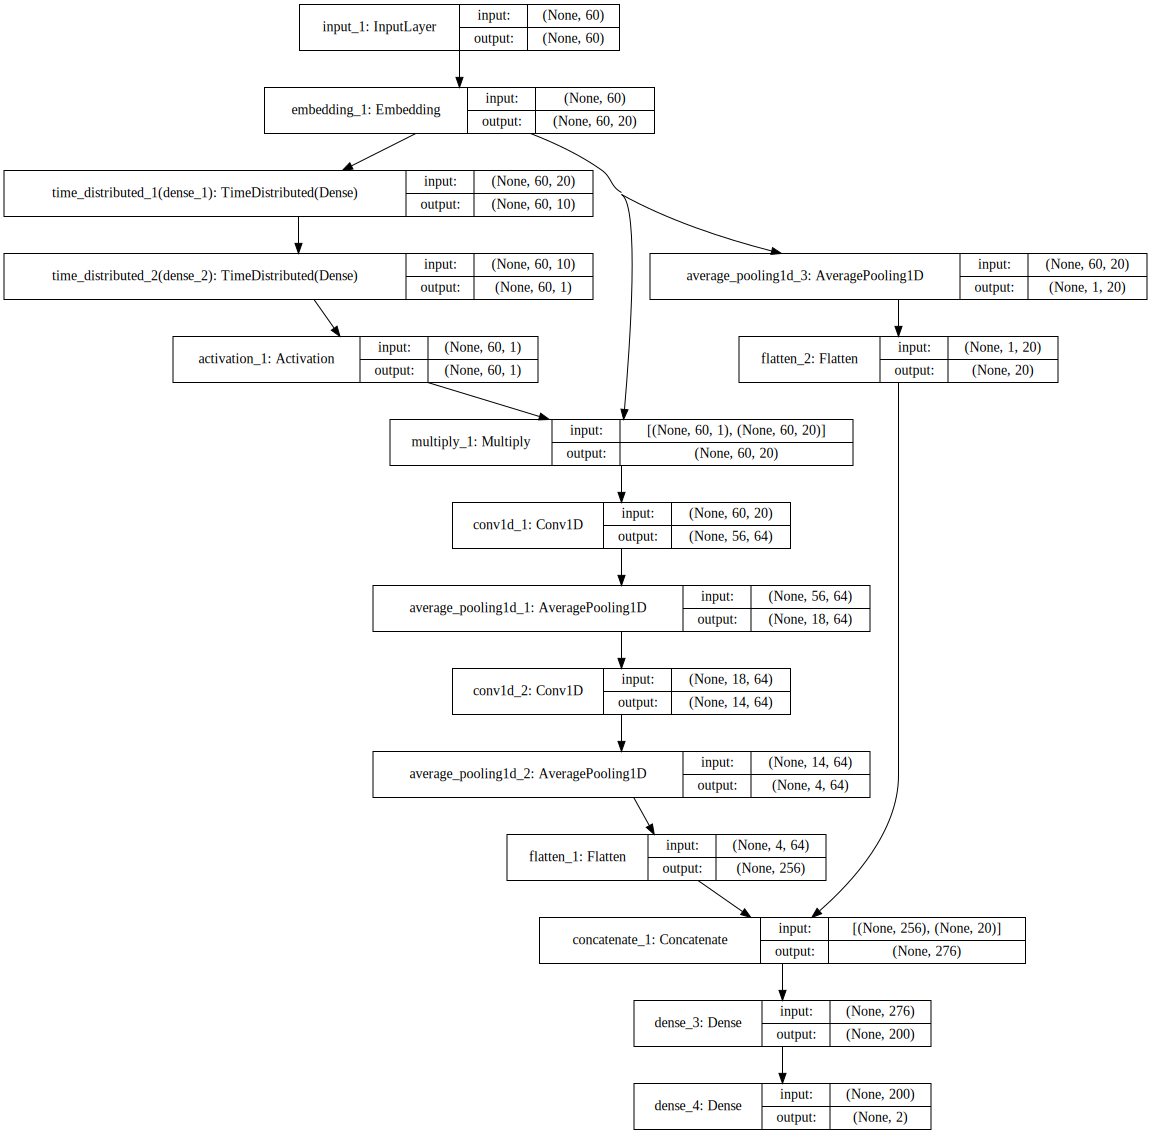

In [117]:


#CNN
from keras.layers import Embedding
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot



#https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py 

def getCNN():
    input1=keras.layers.Input(shape=(LengthOfInputSequences,))    
    
    kernel_size = 3
    filters = 64
    pool_size = 3
    lstm_output_size=64
    '''
    x1=Embedding(input_dim=len(tfidfDict), #modelW2V.get_output_matrix().shape[0],
                input_length=LengthOfInputSequences,
                output_dim=100,     #modelW2V.get_output_matrix().shape[1],
                 trainable=True,
                #weights=[modelW2V.get_output_matrix()],
                #
               )(input1)
               '''
    x1=Embedding(input_dim=modelW2V.get_output_matrix().shape[0],
                input_length=LengthOfInputSequences,
                output_dim=modelW2V.get_output_matrix().shape[1],      
                 weights=[modelW2V.get_output_matrix()],
               )(input1)
    #x1=Dropout(0.2)(x1)
    x1=Conv1D(filters=filters,kernel_size=kernel_size)(x1)
    #x1=Dropout(0.2)(x1)
    #x1=Conv1D(filters=filters,kernel_size=kernel_size)(x1)
    #x1=Dropout(0.2)(x1)
    #x1=Conv1D(filters=filters,kernel_size=kernel_size)(x1)
    x1=MaxPooling1D(pool_size=pool_size)(x1)
    x1=Conv1D(filters=filters,kernel_size=kernel_size)(x1)
    x1=MaxPooling1D(pool_size=pool_size)(x1)
    #x1=Dropout(0.2)(x1)
    x1=LSTM(lstm_output_size)(x1)
    #x1=keras.layers.
    #x1=Flatten()(x1)
    
    
    
   
    
    
    
    
    
    #x1=Dropout(0.2)(x1)
    addLayer=Dense(512)(x1)
    output=Dense(2)(addLayer)
    output=Activation('softmax')(output)
    
    
    
    seq=keras.models.Model(inputs=[input1],outputs=output)
    
    seq.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    seq.summary()
    return seq


def getSparseMLP():
    model = Sequential()
    model.add(Dense(2048))
    return model
    pass

def getMLP():
    input1=keras.layers.Input(shape=(LengthOfInputSequences,))    
    
    kernel_size = 5
    filters = 32
    pool_size = 4
    lstm_output_size=512
    '''
    x1=Embedding(input_dim=len(tfidfDict), #modelW2V.get_output_matrix().shape[0],
                input_length=LengthOfInputSequences,
                output_dim=100,     #modelW2V.get_output_matrix().shape[1],
                 trainable=True,
                #weights=[modelW2V.get_output_matrix()],
                #
               )(input1)
               '''
    
    x1=Embedding(input_dim=modelW2V.get_output_matrix().shape[0],
                input_length=LengthOfInputSequences,
                output_dim=modelW2V.get_output_matrix().shape[1],      
                weights=[modelW2V.get_output_matrix()],
                #trainable=False,
                 )(input1)

   
    #x1=Flatten()(x1)
    #x1=LSTM(512)(x1)
    #x1=Dropout(0.2)(x1)
    #addLayer=Dense(512)(x1)
    output=Dense(2)(x1)
    output=Activation('softmax')(output)
    
    
    
    seq=keras.models.Model(inputs=[input1],outputs=output)
    
    #seq.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    seq.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    seq.summary()
    return seq
def getCNNIMDB2():
    model = Sequential()
    kernel_size = 5
    filters = 64
    pool_size = 4
    lstm_output_size=70
    '''
    model.add(Embedding(modelW2V.get_output_matrix().shape[0], 
                        modelW2V.get_output_matrix().shape[1], 
                        input_length=LengthOfInputSequences,
                        weights=[modelW2V.get_output_matrix()]
                       ))
     '''            
    model.add(Embedding(input_dim=len(tfidfDict),
                input_length=LengthOfInputSequences,
                output_dim=20,      
                #weights=[modelW2V.get_output_matrix()],
                #trainable=False,
               ))
    
    model.add(Dropout(0.25))
    model.add(Conv1D(filters,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(lstm_output_size))
    model.add(Dense(200,activation='relu'))
    model.add(Dense(200,activation='relu'))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

def getCNNIMDB3():
    model = Sequential()
    kernel_size = 5
    filters = 64
    pool_size = 4
    lstm_output_size=70
       
    model.add(Embedding(input_dim=len(tfidfDict),
                input_length=LengthOfInputSequences,
                output_dim=20,      
                #weights=[modelW2V.get_output_matrix()],
                #trainable=False,
               ))
    
    model.add(Dropout(0.25))
    model.add(Conv1D(filters,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(TimeDistributed(Dense(1)))
    model.add(LSTM(lstm_output_size))
    model.add(Dense(200,activation='relu'))
    
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def getAvgWordVector():
    model = Sequential()
    kernel_size = 5
    filters = 64
    pool_size = 4
    lstm_output_size=70
    input1=Input(shape=(60,))   
    x1=Embedding(input_dim=len(tfidfDict),
                input_length=LengthOfInputSequences,
                output_dim=20,   )(input1)
    #x2=Conv1D(filters=64,kernel_size=kernel_size)(x1)
    x2=keras.layers.AveragePooling1D(60)(x1)
    x2=Flatten()(x2)
    #x2=LSTM(50)(x2)
    #x2=MaxPooling1D(pool_size=4)(x2)
    #x2=LSTM(50)(x2)
    
    #conv=keras.layers.Concatenate()([conv,x2])
    conv=x2
    conv=Dense(200)(conv)
    output=Dense(2)(conv)
    
    seq=keras.models.Model(inputs=[input1],outputs=output)
    
    seq.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    seq.summary()
    return seq


def getLSTM():
    model = Sequential()
    kernel_size = 5
    filters = 64
    pool_size = 4
    lstm_output_size=70
    input1=Input(shape=(60,))   
    x1=Embedding(input_dim=len(tfidfDict),
                input_length=LengthOfInputSequences,
                output_dim=20,   )(input1)

    x1=keras.layers.Bidirectional(LSTM(50))(x1)
    #only lstm ok
    #test with blstm  ok
    

    conv=Dense(200)(x1)
    output=Dense(2)(conv)
    
    seq=keras.models.Model(inputs=[input1],outputs=output)
    
    seq.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    seq.summary()
    return seq

def getLSTMAT():
    model = Sequential()
    kernel_size = 5
    filters = 64
    pool_size = 4
    lstm_output_size=70
    input1=Input(shape=(60,))   
    x1=Embedding(input_dim=len(tfidfDict),
                input_length=LengthOfInputSequences,
                output_dim=20,   )(input1)

    '''attentation'''
    
    #https://stackoverflow.com/questions/42918446/how-to-add-an-attention-mechanism-in-keras
    #https://github.com/keras-team/keras/issues/9658
    #https://github.com/keras-team/keras/issues/2403
    attention=TimeDistributed(Dense(10))(x1)
    attention=TimeDistributed(Dense(1))(attention)
    attention=Activation('softmax')(attention)
    
    x1=Multiply()([attention,x1])
    x1=keras.layers.Bidirectional(LSTM(50))(x1)
    #only lstm ok
    #test with blstm  ok
    
    
    
    #x1=keras.layers.Bidirectional(LSTM(50))(x1)
    conv=Dense(200)(x1)
    output=Dense(2)(conv)
    
    seq=keras.models.Model(inputs=[input1],outputs=output)
    
    seq.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    seq.summary()
    return seq


def getCNNAT():
    model = Sequential()
    kernel_size = 5
    filters = 64
    pool_size = 4
    lstm_output_size=70
    input1=Input(shape=(60,))   
    em=Embedding(input_dim=len(tfidfDict),
                input_length=LengthOfInputSequences,
                output_dim=20,   )(input1)

    '''attentation'''
    
    #https://stackoverflow.com/questions/42918446/how-to-add-an-attention-mechanism-in-keras
    #https://github.com/keras-team/keras/issues/9658
    #https://github.com/keras-team/keras/issues/2403
    attention=TimeDistributed(Dense(10))(em)
    attention=TimeDistributed(Dense(1))(attention)
    attention=Activation('softmax')(attention)
    
    x1=Multiply()([attention,em])
    x1=Conv1D(filters=64,kernel_size=kernel_size)(x1)
    x1=keras.layers.AveragePooling1D(3)(x1)
    x1=Conv1D(filters=64,kernel_size=kernel_size)(x1)
    x1=keras.layers.AveragePooling1D(3)(x1)
    x1=Flatten()(x1)
    x2=keras.layers.AveragePooling1D(60)(em)
    x2=Flatten()(x2)
    x1=keras.layers.Concatenate()([x1,x2])
    #only lstm ok
    #test with blstm  ok
    
    
    
    #x1=keras.layers.Bidirectional(LSTM(50))(x1)
    conv=Dense(200)(x1)
    output=Dense(2)(conv)
    
    seq=keras.models.Model(inputs=[input1],outputs=output)
    
    seq.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    seq.summary()
    return seq


from keras import backend as K
K.clear_session()
crf=getCNNAT()

#plot_model(crf, to_file='lstm-mlp.png',show_shapes=True)
SVG(model_to_dot(crf, show_shapes=True).create(prog='dot', format='svg'))

In [30]:
LengthOfInputSequences=60
trainCnnIndex=list(map(toCnnIndexAllinOne,trainxRaw))
devCnnIndex=list(map(toCnnIndexAllinOne,devxRaw))
testCnnIndex=list(map(toCnnIndexAllinOne,testxRaw))

In [118]:
trainCnnIndex=np.array(trainCnnIndex)
print(trainCnnIndex.shape)
devCnnIndex=np.array(devCnnIndex)
print(devCnnIndex.shape)
testCnnIndex=np.array(testCnnIndex)
print(testCnnIndex.shape)

cnnTrainy=[0 if s=='DUT' else 1 for s in trainy]
cnnDevy=[0 if s=='DUT' else 1 for s in evaly]
cnnTesty=[0 if s=='DUT' else 1 for s in testy]
cnnTrainyCat=keras.utils.to_categorical(cnnTrainy)
cnnDevyCat= keras.utils.to_categorical(cnnDevy)
import os
os.system('mkdir -p models')
#fullTrainX=np.vstack((trainCnnIndex,devCnnIndex))
#fullTrainY=np.concatenate((cnnTrainyCat,cnnDevyCat))
sf=sklearn.model_selection.StratifiedKFold(20)
cnnmodelCount=0
for trainindex,devindex in sf.split(trainCnnIndex,cnnTrainy):
    K.clear_session()
    crf=getCNNAT()
    modelFile='./models/cnn_%d.hdf5'%(cnnmodelCount)
    callbacks = [EarlyStopping(monitor='val_loss',
                               patience=2,
                               verbose=1,
                               min_delta=0.01,
                               mode='min'),
                 ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.1,
                                   patience=0,
                                   verbose=1,
                                   epsilon=0.0001,
                                   mode='min'),
                 ModelCheckpoint(monitor='val_loss',
                                 filepath=modelFile,
                                 save_best_only=True,
                                 save_weights_only=True,
                                 verbose=1,
                                 mode='min'),
                 ]
    '''
    crf.fit(trainCnnIndex,
            cnnTrainyCat,
            validation_data=(devCnnIndex,cnnDevyCat),
            epochs=100,batch_size=256,
            callbacks=callbacks)
            '''
    crf.fit(trainCnnIndex[trainindex],
            cnnTrainyCat[trainindex],       
            validation_data=(trainCnnIndex[devindex],cnnTrainyCat[devindex]),
            epochs=100,batch_size=256,
            callbacks=callbacks,
            )
    crf.load_weights(modelFile)
    devCnnIndex=trainCnnIndex[devindex]
    cnnDevy= np.argmax( cnnTrainyCat[devindex],axis=1)
    predictValue=crf.predict(devCnnIndex)
    
    #predict=[0 if s <th else 1 for s in predictValue]
    predict=np.argmax(predictValue,axis=1)
    print('------------%d------CROSS-------'%(cnnmodelCount))
    print(confusion_matrix(cnnDevy,predict))
    print(classification_report(cnnDevy,predict))
    
    
    #check out the real test
    predictValue=crf.predict(testCnnIndex)
    
    #predict=[0 if s <th else 1 for s in predictValue]
    predict=np.argmax(predictValue,axis=1)
    print('------------%d------TEST-----------'%(cnnmodelCount))
    print(confusion_matrix(cnnTesty,predict))
    print(classification_report(cnnTesty,predict))
    #print(predictValue.shape)
    #fpr, tpr, thresholds = metrics.roc_curve(cnnDevy, predictValue)
    #print(thresholds)
    #print(i,metrics.auc(fpr, tpr))
    cnnmodelCount+=1

(300000, 60)
(15000, 60)
(20000, 60)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 60)            0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 60, 20)        825100      input_1[0][0]                    
____________________________________________________________________________________________________
time_distributed_1 (TimeDistribu (None, 60, 10)        210         embedding_1[0][0]                
____________________________________________________________________________________________________
time_distributed_2 (TimeDistribu (None, 60, 1)         11          time_distributed_1[0][0]         
______________________________________________________

KeyboardInterrupt: 

In [78]:
for th in (sorted(set(predictValue.squeeze()))):
    predict=[0 if s <th else 1 for s in predictValue]
    #predict=np.argmax(predictValue,axis=1)
    print('------------%d--%f---------------'%(i,th))
    print(confusion_matrix(cnnDevy,predict))
    print(classification_report(cnnDevy,predict))
    pass

------------0--0.031269---------------
[[  0 250]
 [  0 250]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       250
          1       0.50      1.00      0.67       250

avg / total       0.25      0.50      0.33       500

------------0--0.034581---------------
[[  1 249]
 [  0 250]]
             precision    recall  f1-score   support

          0       1.00      0.00      0.01       250
          1       0.50      1.00      0.67       250

avg / total       0.75      0.50      0.34       500

------------0--0.045967---------------
[[  2 248]
 [  0 250]]
             precision    recall  f1-score   support

          0       1.00      0.01      0.02       250
          1       0.50      1.00      0.67       250

avg / total       0.75      0.50      0.34       500

------------0--0.056271---------------
[[  2 248]
 [  1 249]]
             precision    recall  f1-score   support

          0       0.67      0.01      0.02       250


/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[ 45 205]
 [ 14 236]]
             precision    recall  f1-score   support

          0       0.76      0.18      0.29       250
          1       0.54      0.94      0.68       250

avg / total       0.65      0.56      0.49       500

------------0--0.195845---------------
[[ 46 204]
 [ 14 236]]
             precision    recall  f1-score   support

          0       0.77      0.18      0.30       250
          1       0.54      0.94      0.68       250

avg / total       0.65      0.56      0.49       500

------------0--0.196674---------------
[[ 46 204]
 [ 15 235]]
             precision    recall  f1-score   support

          0       0.75      0.18      0.30       250
          1       0.54      0.94      0.68       250

avg / total       0.64      0.56      0.49       500

------------0--0.197124---------------
[[ 47 203]
 [ 15 235]]
             precision    recall  f1-score   support

          0       0.76      0.19      0.30       250
          1       0.54      0.94      0

In [84]:
predict=np.argmax(predictValue,axis=1)
print(confusion_matrix(cnnDevy,predict))
print(classification_report(cnnDevy,predict))

[[160  90]
 [ 78 172]]
             precision    recall  f1-score   support

          0       0.67      0.64      0.66       250
          1       0.66      0.69      0.67       250

avg / total       0.66      0.66      0.66       500



In [314]:
from sklearn import metrics
predictValue=crf.predict(devCnnIndex)
print(predictValue[:10])
print(cnnDevy[:10])

fpr, tpr, thresholds = metrics.roc_curve(cnnDevy, predictValue)
#print(thresholds)
print(metrics.auc(fpr, tpr))

[[ 0.98669726]
 [ 0.90711826]
 [ 0.68903399]
 [ 0.99862909]
 [ 0.99080515]
 [ 0.98143768]
 [ 0.83035284]
 [ 0.99558926]
 [ 0.99611318]
 [ 0.17857675]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.688224


In [ ]:
#end of simple CNN

150000


(0, 300)

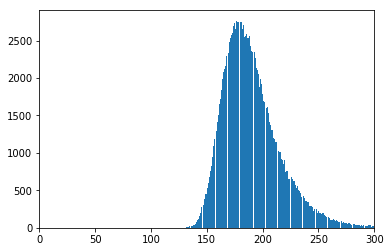

In [106]:
#word embedings
lenDUs=[len(s) for s in rawDu]
print(len(lenDUs))
plt.hist(lenDUs,bins=1000)
plt.xlim(0,300)

(0, 300)

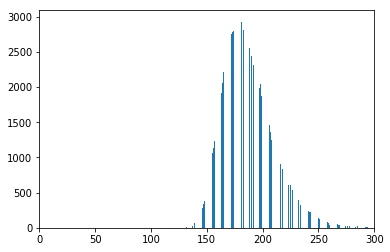

In [105]:
lenBELs=[len(s) for s in rawBel]
plt.hist(lenBELs,bins=1000)
plt.xlim(0,300)

150000
56 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 80, 83, 95, 98, 105, 126, 171, 203]
49 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]


(0, 60)

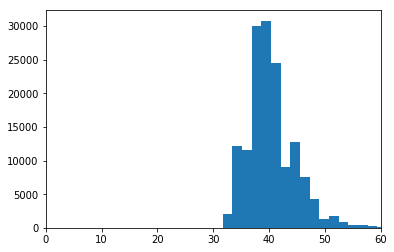

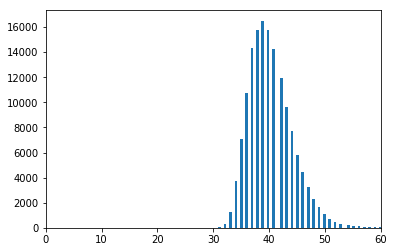

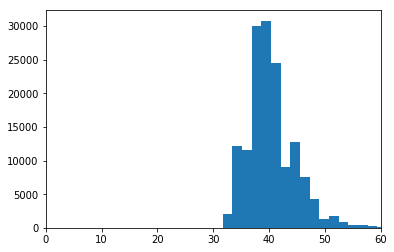

In [104]:
lenDUs=[len(s.split()) for s in rawDu]
print(len(lenDUs))
print(len(set(lenDUs)),sorted(set(lenDUs)))
plt.figure()
plt.hist(lenDUs,bins=100)
plt.xlim(0,60)
lenBELs=[len(s.split()) for s in rawBel]
print(len(set(lenBELs)),sorted(set(lenBELs)))
plt.figure()
plt.hist(lenBELs,bins=100)
plt.xlim(0,60)
plt.figure()
plt.hist(lenDUs,bins=100)
plt.xlim(0,60)

In [120]:
alldu=' '.join(rawDu)
allbel=' '.join(rawBel)

In [121]:
for s in [',','.','?','!']:
    print(alldu.count(s),allbel.count(s))


157725 183736
690629 708076
118236 136742
1450 110


In [40]:
from fastText import train_unsupervised
modelDUT=train_unsupervised(rawdutFile,model='skipgram')
modelDUT.save_model('./data/model.dut')
modelBEL=train_unsupervised(rawbelFile,model='skipgram')
modelBEL.save_model('./data/model.bel')

In [42]:
print(modelDUT.get_word_vector('king'))

[ 0.49957323 -0.22804885 -0.32661757 -0.135037   -0.4285343   0.05748361
 -0.30789647  0.35027662 -0.7199924   0.24762928 -0.55427676 -0.28550458
  0.41219109  0.36858508  0.17004927  0.18557267 -0.00182276 -0.20368603
  0.8597337   0.35776418 -0.06100864  0.51243538  0.0867442  -0.16818188
 -0.19422162 -0.6114198   0.77921373  0.2121985   0.5454917  -0.19107008
 -0.26988694  0.24004583 -0.62325007  0.54945314 -0.31511647  0.11806463
  0.17451186  0.26779199  0.02646391 -0.23503387 -0.12956455  0.26389471
 -0.04559888  0.23596525 -0.48916444 -0.83028793  0.06031936 -0.21574034
  0.037954    0.32742545 -0.49152359 -0.27880195 -0.27608162 -0.04392534
  0.35020268  0.56100959  0.16326417 -0.08740969  0.04876515  0.2692546
  0.24521498  0.62413239  0.15785673 -0.19375294  0.28960162  0.09436969
  0.64159173  0.21011961  0.29346746 -0.16046356  0.05896864  0.36044773
  0.14098091  0.35768515 -0.61971235  0.06191366  0.24490903  0.15729178
 -0.03790499  0.24350733 -0.15024269  0.02303209  0.

In [141]:
def raw2MeanVector2(modela,modelb,texts):
    vss=[]
    if type(texts)!=list:
        texts=[texts]
    for t in texts:
        v1s,v2s=[],[]
        for w in t.split():
            v1s.append(modela.get_word_vector(w))
            v2s.append(modelb.get_word_vector(w))
        v1s=np.mean(np.array(v1s),axis=0)   
        v2s=np.mean(np.array(v2s),axis=0)
        vss.append( np.hstack((v1s,v2s)))
    return np.array(vss)

def raw2MeanVector(modela,modelb,texts):
    vss=[]
    if type(texts)!=list:
        texts=[texts]
    for t in texts:
        v1s,v2s=modela.get_sentence_vector(t),modelb.get_sentence_vector(t)        
        vss.append( np.hstack((v1s,v2s)))
    return np.array(vss)


meanVector=raw2MeanVector(modelDUT,modelBEL,trainxRaw)
print (meanVector.shape)

(300000, 200)


In [140]:
modelDUT.get_sentence_vector(trainxRaw[0])

array([ 0.07397734,  0.03471294, -0.04198583, -0.12459175,  0.16131328,
        0.03778868,  0.00948046, -0.10236049, -0.07283383,  0.17764598,
       -0.09355266,  0.11038069,  0.00420704, -0.06964095, -0.00615061,
       -0.10761622,  0.04966148,  0.01723301,  0.07783248,  0.05593039,
       -0.04921625,  0.1767507 ,  0.04861021,  0.05147902, -0.04940193,
       -0.04682404,  0.09164505,  0.01948317,  0.08209245,  0.05857224,
        0.01429278, -0.09955533, -0.05513987, -0.09302238, -0.07820313,
       -0.00562016,  0.02670372, -0.00882121, -0.06828126,  0.10187826,
       -0.06575949, -0.02952009,  0.0105079 ,  0.02630074, -0.05022471,
       -0.09049001, -0.02762979, -0.20462756, -0.02991704,  0.05746111,
       -0.02401965, -0.11073597, -0.14145273,  0.02010405, -0.00620565,
        0.0348949 ,  0.06959935,  0.09804574,  0.0394443 ,  0.10496492,
       -0.01532972,  0.06962698,  0.01059645,  0.00873911, -0.03730577,
        0.02768884, -0.02374511, -0.06597299, -0.01245592, -0.05

In [142]:
devMeanVector=raw2MeanVector(modelDUT,modelBEL,devxRaw)

In [144]:
print(meanVector.shape,devMeanVector.shape)

(300000, 200) (500, 200)


In [143]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis()

clf.fit(meanVector,trainy)
predictValue=clf.predict(devMeanVector)
print(confusion_matrix(evaly,predictValue))
print(classification_report(evaly,predictValue))

[[153  97]
 [103 147]]
             precision    recall  f1-score   support

        BEL       0.60      0.61      0.60       250
        DUT       0.60      0.59      0.60       250

avg / total       0.60      0.60      0.60       500



In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=lgb.LGBMClassifier(num_leaves=150,n_jobs=12,
                                learning_rate=0.1,n_estimators=1000,silent=False)

clf.fit(meanVector,trainy,early_stopping_rounds=20,
        eval_set=(devMeanVector,evaly),
        verbose=True)
predictValue=clf.predict(devMeanVector,) #clf.best_iteration_
print(confusion_matrix(evaly,predictValue))
print(classification_report(evaly,predictValue))

[1]	valid_0's binary_logloss: 0.691244
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's binary_logloss: 0.689616
[3]	valid_0's binary_logloss: 0.687869
[4]	valid_0's binary_logloss: 0.687216
[5]	valid_0's binary_logloss: 0.686048
[6]	valid_0's binary_logloss: 0.685488
[7]	valid_0's binary_logloss: 0.684943
[8]	valid_0's binary_logloss: 0.684723
[9]	valid_0's binary_logloss: 0.683401
[10]	valid_0's binary_logloss: 0.684135
[11]	valid_0's binary_logloss: 0.683675
[12]	valid_0's binary_logloss: 0.683015
[13]	valid_0's binary_logloss: 0.682669
[14]	valid_0's binary_logloss: 0.68068
[15]	valid_0's binary_logloss: 0.679922
[16]	valid_0's binary_logloss: 0.679483
[17]	valid_0's binary_logloss: 0.678263
[18]	valid_0's binary_logloss: 0.677897
[19]	valid_0's binary_logloss: 0.677443
[20]	valid_0's binary_logloss: 0.676216
[21]	valid_0's binary_logloss: 0.675587
[22]	valid_0's binary_logloss: 0.674694
[23]	valid_0's binary_logloss: 0.673446
[24]	valid_0's binary_loglos

In [67]:
clf=lgb.LGBMClassifier(num_leaves=150,n_jobs=12,
                                learning_rate=0.1,n_estimators=1000,silent=False)

clf.fit(trainx,trainy,early_stopping_rounds=20,
        eval_set=(evalx,evaly),
        verbose=True)
predictValue=clf.predict(evalx)
print(confusion_matrix(evaly,predictValue))
print(classification_report(evaly,predictValue))

[1]	valid_0's binary_logloss: 0.689864
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.687639
[3]	valid_0's binary_logloss: 0.685551
[4]	valid_0's binary_logloss: 0.684079
[5]	valid_0's binary_logloss: 0.68207
[6]	valid_0's binary_logloss: 0.681018
[7]	valid_0's binary_logloss: 0.679126
[8]	valid_0's binary_logloss: 0.678645
[9]	valid_0's binary_logloss: 0.677536
[10]	valid_0's binary_logloss: 0.676601
[11]	valid_0's binary_logloss: 0.675288
[12]	valid_0's binary_logloss: 0.674611
[13]	valid_0's binary_logloss: 0.673239
[14]	valid_0's binary_logloss: 0.672608
[15]	valid_0's binary_logloss: 0.67165
[16]	valid_0's binary_logloss: 0.671322
[17]	valid_0's binary_logloss: 0.671675
[18]	valid_0's binary_logloss: 0.670968
[19]	valid_0's binary_logloss: 0.670367
[20]	valid_0's binary_logloss: 0.669897
[21]	valid_0's binary_logloss: 0.669244
[22]	valid_0's binary_logloss: 0.668914
[23]	valid_0's binary_logloss: 0.66893
[24]	valid_0's binary_logloss:

In [156]:
methods=[method_name for method_name in dir(modelDUT)]
dutMatrix=modelDUT.get_output_matrix()
dutWords=modelDUT.get_words()
print(dutMatrix.shape,len(dutWords))
belMatrix=modelBEL.get_output_matrix()
belWords=modelBEL.get_words()
print(belMatrix.shape,len(belWords))

(29317, 100) 29317
(27665, 100) 27665


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 70)            0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 70)            0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 70, 100)       2931700     input_1[0][0]                    
____________________________________________________________________________________________________
embedding_2 (Embedding)          (None, 70, 100)       2766500     input_2[0][0]                    
___________________________________________________________________________________________

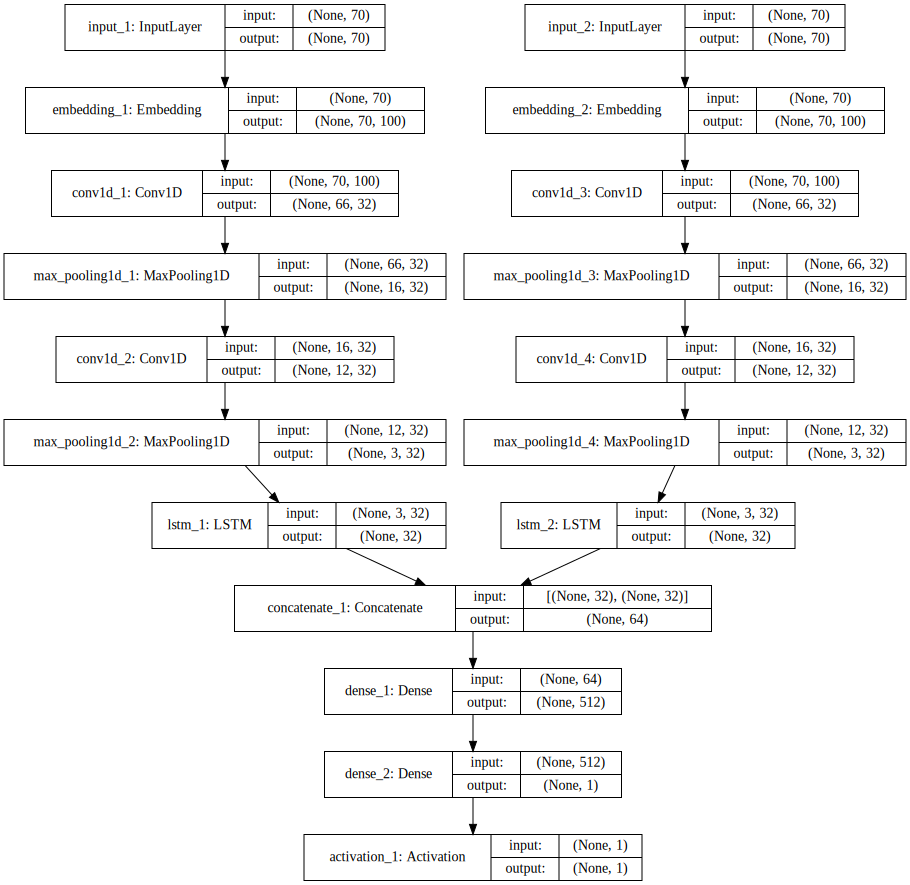

In [247]:


#CNN
from keras.layers import Embedding
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot



#https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py 

def getCNN():
    input1=keras.layers.Input(shape=(70,))    
    LengthOfInputSequences=70
    kernel_size = 5
    filters = 32
    pool_size = 4
    lstm_output_size=32
    x1=Embedding(input_dim=dutMatrix.shape[0],
                input_length=LengthOfInputSequences,
                output_dim=dutMatrix.shape[1],
                weights=[dutMatrix],
                trainable=False
               )(input1) 
    #x1=Dropout(0.2)(x1)
    x1=Conv1D(filters=filters,kernel_size=kernel_size)(x1)
    x1=MaxPooling1D(pool_size=pool_size)(x1)
    x1=Conv1D(filters=filters,kernel_size=kernel_size)(x1)
    x1=MaxPooling1D(pool_size=pool_size)(x1)
    #x1=Dropout(0.2)(x1)
    x1=LSTM(lstm_output_size)(x1)
    
    
    
    input2=keras.layers.Input(shape=(70,))
    SizeOfTheVocabulary=len(dutWords)
    LengthOfInputSequences=70
    x2=Embedding(input_dim=belMatrix.shape[0],
                input_length=LengthOfInputSequences,
                output_dim=belMatrix.shape[1],
                weights=[belMatrix],
                trainable=False
               )(input2)
    #x2=Dropout(0.2)(x2)
    x2=Conv1D(filters=filters,kernel_size=kernel_size)(x2)
    x2=MaxPooling1D(pool_size=pool_size)(x2)
    x2=Conv1D(filters=filters,kernel_size=kernel_size)(x2)
    x2=MaxPooling1D(pool_size=pool_size)(x2)
    #x2=Dropout(0.2)(x2)
    x2=LSTM(lstm_output_size)(x2)
    
    
    
    
    
    
    addLayer=keras.layers.Concatenate()([x1,x2])
    x1=Dropout(0.2)(x1)
    addLayer=Dense(512)(addLayer)
    output=Dense(1)(addLayer)
    output=Activation('sigmoid')(output)
    
    
    
    seq=keras.models.Model(inputs=[input1,input2],outputs=output)
    seq.summary()
    seq.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return seq
from keras import backend as K
K.clear_session()
crf=getCNN()

#plot_model(crf, to_file='lstm-mlp.png',show_shapes=True)
SVG(model_to_dot(crf, show_shapes=True).create(prog='dot', format='svg'))

In [167]:
print(dutWords[0],belWords[0])

. .


In [180]:
sa=set([1,2,3])
sb=set([2,4])
print(sa-sb)
print(sb-sa)
print(sa|sb)

{1, 3}
{4}
{1, 2, 3, 4}


In [175]:
print(len(set(dutWords)-set(belWords)))
print(len(set(belWords)-set(dutWords)))
print(len(set(belWords)|set(dutWords)))

7442
5790
35107


In [235]:
w2vDim=100
def textToIndex(wordList,texts,maxlen=70):
    rv=[]
    wordDict={w:windex for windex,w in enumerate(wordList)}
    for t in texts:
        lenWords=[]
        for w in t.split():
            
            if w in wordDict:
                lenWords.append(wordDict[w])
            #else:
            #    lenWords.append(0)
        while(len(lenWords)<maxlen):
            lenWords.append(0)
        rv.append(lenWords[:maxlen])
    return np.array(rv)

trainDuIndex=textToIndex(dutWords,trainxRaw)
trainBelIndex=textToIndex(dutWords,trainxRaw)
                
devDuIndex=textToIndex(dutWords,devxRaw)
devBelIndex=textToIndex(dutWords,devxRaw)        
    

In [236]:
print(trainDuIndex.shape,trainDuIndex[0])

(300000, 70) [   10   158     1   488    12     0     1    41     9  1449   290    26
     6  8840    14    31   402     0   109     9    20 10556  4030   511
 13922     0     8    10    71    59    12     7     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0]


In [49]:
cnnTrainy=[0 if s=='DUT' else 1 for s in trainy]
cnnDevy=[0 if s=='DUT' else 1 for s in evaly]

In [231]:
print (cnnTrainy[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [248]:
crf.fit([trainDuIndex,trainBelIndex],
        cnnTrainy,
        validation_data=([devDuIndex,devBelIndex],cnnDevy),epochs=9,batch_size=256)


Train on 300000 samples, validate on 500 samples
Epoch 1/9
300000/300000 [==============================] - 19s - loss: 0.6739 - acc: 0.5762 - val_loss: 0.6729 - val_acc: 0.5680
Epoch 2/9
300000/300000 [==============================] - 18s - loss: 0.6569 - acc: 0.6054 - val_loss: 0.6708 - val_acc: 0.5720
Epoch 3/9
300000/300000 [==============================] - 18s - loss: 0.6409 - acc: 0.6260 - val_loss: 0.6608 - val_acc: 0.5860
Epoch 4/9
300000/300000 [==============================] - 18s - loss: 0.6256 - acc: 0.6442 - val_loss: 0.6635 - val_acc: 0.6060
Epoch 5/9
300000/300000 [==============================] - 18s - loss: 0.6110 - acc: 0.6584 - val_loss: 0.6857 - val_acc: 0.5800
Epoch 6/9
300000/300000 [==============================] - 18s - loss: 0.5992 - acc: 0.6711 - val_loss: 0.6826 - val_acc: 0.5720
Epoch 7/9
300000/300000 [==============================] - 18s - loss: 0.5890 - acc: 0.6805 - val_loss: 0.6881 - val_acc: 0.5800
Epoch 8/9
300000/300000 [=======================

In [249]:
from sklearn import metrics
predictValue=crf.predict([devDuIndex,devBelIndex])
print(predictValue[:10])
print(cnnDevy[:10])

fpr, tpr, thresholds = metrics.roc_curve(cnnDevy, predictValue)
#print(thresholds)
print(metrics.auc(fpr, tpr))
#print(confusion_matrix(cnnDevy,predictValue))
#print(classification_report(cnnDevy,predictValue))

[[ 0.58024412]
 [ 0.43893683]
 [ 0.61475945]
 [ 0.2647222 ]
 [ 0.28319511]
 [ 0.71227461]
 [ 0.60813922]
 [ 0.67268556]
 [ 0.91106439]
 [ 0.72659934]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.645648


(array([ 52.,  53.,  58.,  55.,  50.,  48.,  64.,  45.,  46.,  29.]),
 array([  5.80069609e-05,   9.99945090e-02,   1.99931011e-01,
          2.99867513e-01,   3.99804015e-01,   4.99740517e-01,
          5.99677019e-01,   6.99613521e-01,   7.99550023e-01,
          8.99486525e-01,   9.99423027e-01]),
 <a list of 10 Patch objects>)

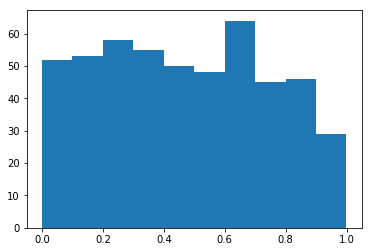

In [223]:
plt.hist(predictValue)